In [1]:
"""
Importação das bibliotecas utilizadas na questão:
1. Numpy = Fornece um grande conjunto de funções e operações de biblioteca 
que auxiliam na realização de cálculos numéricos e manipulação de matrizes.

2. Pandas = Realiza a normalização dos dados.

3. Matplotlib = Trata-se de uma biblioteca que é utilizada para plotar gráficos
"""
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
"""
Função responsável por fazer a leitura dos datasets.
Parâmetros da função: 
primeiro parâmetro = nome do arquivo, 
delimeter = trata-se do que tá separando cada valor do dataset. 
"""
valor = np.genfromtxt('./datasets/ex1data1.txt', delimiter= ',')

In [3]:
"""
Comando realiza a normalização em um data frame e atibui o valor a df
"""
df = pd.DataFrame(data= valor, columns=['X','Y'])

In [4]:
"""
Mostrando a normalização do dataset.
"""
df

,X,Y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


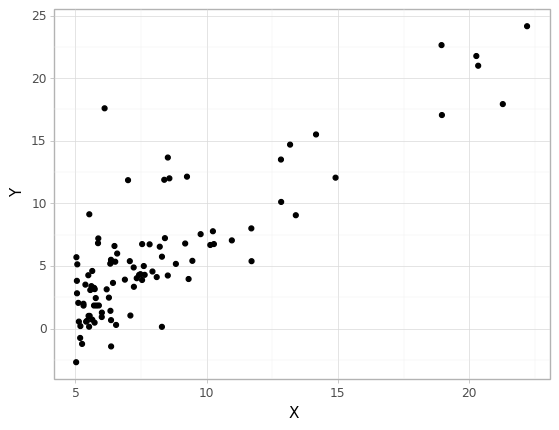

<ggplot: (8756057681061)>

In [5]:
"""
Plotando os dados em um gráfico com o auxílio do plotnine 
"""
(ggplot(df,aes('X','Y'))
 + geom_point()
 + theme_light()
)

**Comentários: Um modelo de regressão linear parece ser adequado para os dados em questão?**

O modelo de regressão linear parece adequado pois, ao obeservar o gráfico percebe-se uma certa regulação entre x e y.

In [6]:
"""
Realiza uma cópia desse do data frame visto que ele será permutado.
Após é exibido o data frame copiado.
"""
df_shuffle = df.copy()
df_shuffle 

,X,Y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [7]:
"""
Função Gradiente Descedente Simples
"""
w0 = -3 # termo independente
w1 = 10 # coeficiente angular
alfa = 0.001 # Taxa de aprendizado
EQM = list() # Erro Quadrado Médio por época

for epoca in range(1000):
    acc = 0 
    erro = 0
    erro2 = 0
    for i in range(len(df_shuffle)):
        x_i = df_shuffle.iloc[i,0]
        y_i = df_shuffle.iloc[i,1]
        erro += (y_i - w1*x_i - w0)
        erro2 += (y_i - w1*x_i - w0)*df_shuffle.iloc[i,0]
        acc = acc + erro*erro

    w0 = w0 + (alfa*erro)/len(df_shuffle)
    w1 = w1 + (alfa*erro2)/len(df_shuffle)
    
    EQM.append(acc/len(df_shuffle))

In [8]:
"""
Printando pesos encontrados
"""
print("Os pesos encontrados foram", w0, "e", w1)

Os pesos encontrados foram -3.8866660695186104 e 1.1921179627796359


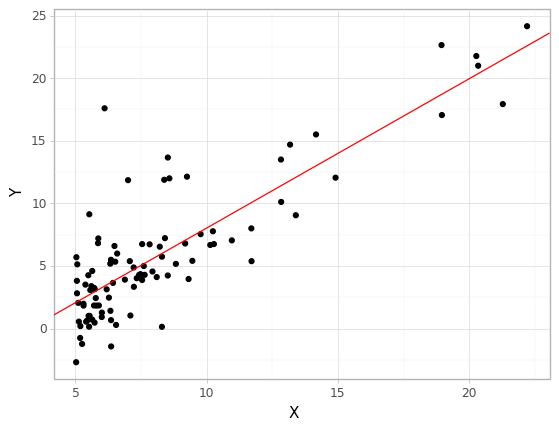

<ggplot: (8756057642245)>

In [9]:
"""
Plotando os dados com a interceptação em um gráfico com o auxílio do plotnine 
"""
(ggplot(df,aes('X','Y'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept=w0 , slope=w1, color='red')
)

In [10]:
"""
Convertendo os dados do erro quadrático médio e exibindo.
"""
EQM_df = pd.DataFrame(data=EQM, columns=[0])
EQM_df

,0
0,1.708991e+07
1,1.437569e+07
2,1.209108e+07
3,1.016822e+07
4,8.549943e+06
...,...
995,2.481322e+03
996,2.481323e+03
997,2.481324e+03
998,2.481325e+03


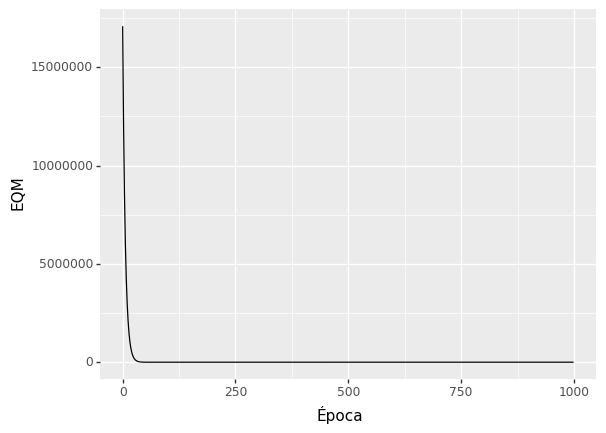

<ggplot: (8756057634645)>

In [11]:
"""
Plotando o erro quadrático médio em um gráfico com o auxílio do plotnine 
"""
(ggplot(EQM_df, aes(EQM_df.index, EQM_df[0]))
+ geom_line()
+ xlab('Época')
+ ylab('EQM')
)

**Comentários: Através do gráfico “épocas x EQM” é possível verificar que o algoritmo está “aprendendo” ?**

O gráfico possui uma tendência decrescente e mostra que o erro quadrático médio estava acima de 15000000 na primeira época e que seu valor final ficou próximo de 2000. Portanto, houve sim aprendizado.